# Problem Statement :

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

# Aim :

__To build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.__ 

In [1]:
# Importing the first required libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

And rest of the libraries will be imported according to our requirements as we proceed further into the project

In [2]:
# Getting the dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


_Displaying the first 5 rows of our dataset, here our target is "Loan_Status"._

# Exploratory Data Analysis :

In [3]:
# Checking shape of the dataset

df.shape

(614, 13)

_So here we have 614 rows and 13 columns, which is not very large dataset._

In [4]:
# Checking the features of the dataset

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# Checking datatype of the dataset

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

_Out of 13 features, only 4 are float datatype and excluding one feature, rest are object datatype, which signifies categorical data._

In [6]:
# Getting more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


_Here we can observe some presence of null values, which will be treated later on._

_And memory used by the dataset is 62.5+ KB._

In [7]:
# Checking for null values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

_As we can observe here, less null values are present in the features, so instead of filling them up, we can simply drop them._

In [8]:
# Dropping null values

df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

_Hence all the null values are dropped._

We can also visualize and check :

In [10]:
# First importing the seaborn library

import seaborn as sns

<AxesSubplot:>

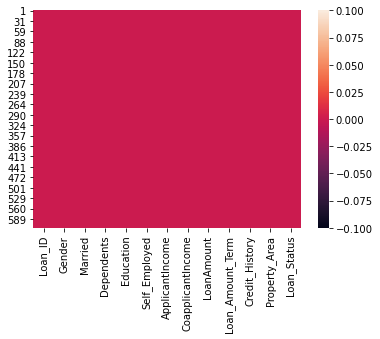

In [11]:
sns.heatmap(df.isnull())

_From the above heatmap visualization we are sure that there are no white spaces, hence no null values._

In [12]:
#Checking for unique values in each feature

df.nunique()

Loan_ID              480
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

_Here we can observe that there are some categories features present in our dataset._

In [13]:
# We need to know the value count of each feature :

for i in df.columns:
        print(df[i].value_counts())
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

LP001572    1
LP001120    1
LP001144    1
LP002244    1
LP002739    1
           ..
LP001319    1
LP001225    1
LP002493    1
LP001656    1
LP001610    1
Name: Loan_ID, Length: 480, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Male      394
Female     86
Name: Gender, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Yes    311
No     169
Name: Married, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Graduate        383
Not Graduate     97
Name: Education, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No     414
Yes     66
Name: Self_Employed, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2500    7
4583    6
2600    5
8333    4
5000    4
       ..
3357    1
3430    1
6500    1
3427    1
7167    1
Name: ApplicantIncome, Length: 405, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0.0       216
1

"Loan_ID" column will not be of any help to us, so we can drop it.

In [14]:
df.drop(["Loan_ID"],axis=1,inplace=True)

In [15]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


Successfully dropped.

In [16]:
df.CoapplicantIncome

1      1508.0
2         0.0
3      2358.0
4         0.0
5      4196.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 480, dtype: float64

_So in this column, there are 216 rows with 0.0 value, and it needs to be replaced. This will be done in the later part of the project._

# Exploring output variable :

In [17]:
df.Loan_Status.unique()

array(['N', 'Y'], dtype=object)

In [18]:
df.Loan_Status.value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

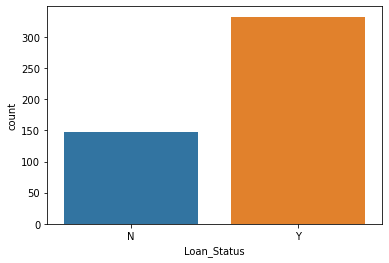

In [19]:
sns.countplot(x='Loan_Status', data=df)

__<font color=orange>Here we can observe imbalanced data in our target. This will be balanced using  SMOTE technique in the later part of the project.</font>__

# Univariate Analysis :

In [22]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Gender', ylabel='count'>

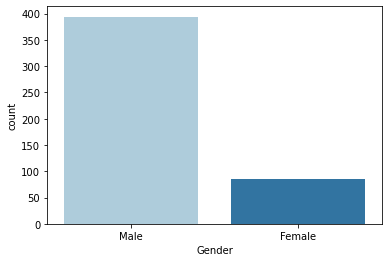

In [25]:
sns.countplot(x='Gender', data=df, palette='Paired')

_Male applicants apply for loan mostly._

<AxesSubplot:xlabel='Married', ylabel='count'>

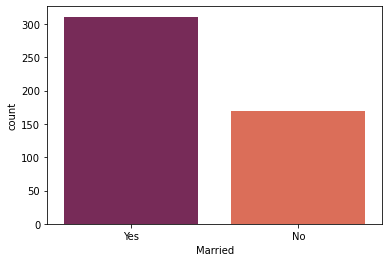

In [26]:
sns.countplot(x='Married', data=df, palette='rocket')

_Most of the Married people are applying for a loan._

<AxesSubplot:xlabel='Dependents', ylabel='Count'>

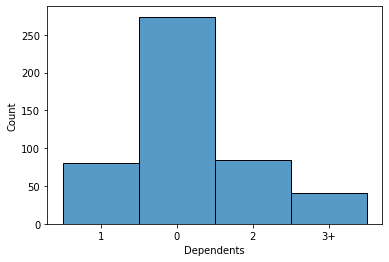

In [27]:
sns.histplot(x='Dependents', data=df, palette='Paired')

_Most of the applicants has zero dependents._

<AxesSubplot:xlabel='Education', ylabel='count'>

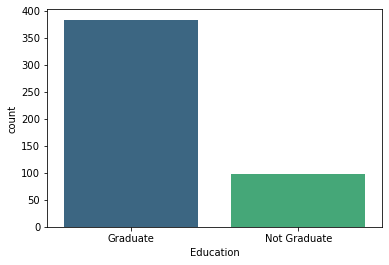

In [31]:
sns.countplot(x='Education', data=df, palette='viridis')

_Mostly educated people are applying for a loan._

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

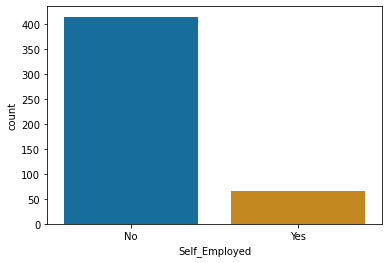

In [33]:
sns.countplot(x='Self_Employed', data=df, palette='colorblind')

_Most applicants are working under some organization._

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

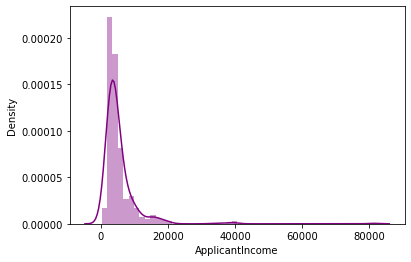

In [35]:
sns.distplot(df['ApplicantIncome'], color="purple")

_Most of the applicants does have a high income. And the data is right skewed too._

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

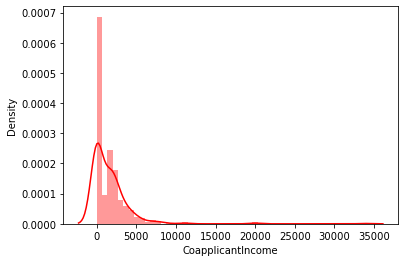

In [37]:
sns.distplot(df['CoapplicantIncome'], color="red")

_This feature is also not normally distributed and has right skewness._

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

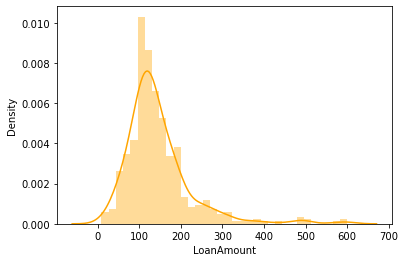

In [38]:
sns.distplot(df['LoanAmount'], color="orange")

_Slight skewness can be observed here too._

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

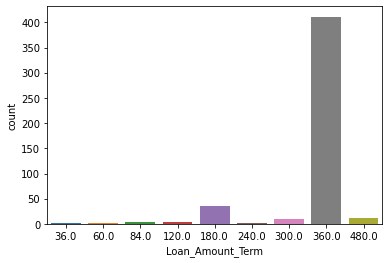

In [43]:
sns.countplot(x='Loan_Amount_Term', data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

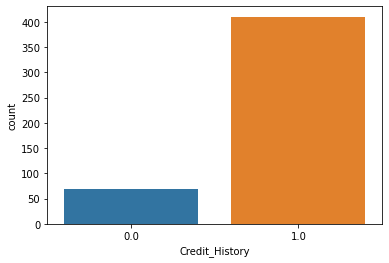

In [44]:
sns.countplot(x='Credit_History', data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

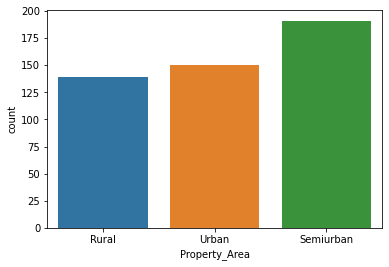

In [45]:
sns.countplot(x='Property_Area', data=df)

_Applicants are mostly from semiurban area._

# Bivariate Analysis :

<AxesSubplot:xlabel='Gender', ylabel='count'>

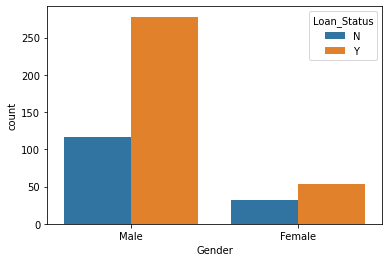

In [48]:
sns.countplot("Gender",hue="Loan_Status",data=df)

_Male applicants has more chances of getting loan approved as compared to female._

<AxesSubplot:xlabel='Married', ylabel='count'>

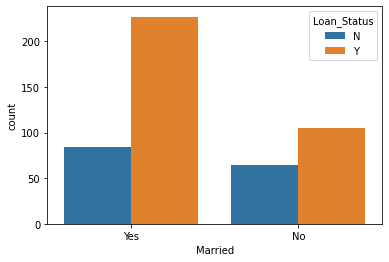

In [49]:
sns.countplot("Married",hue="Loan_Status",data=df)

_Married people has more chances of loan getting approved._

<AxesSubplot:xlabel='Dependents', ylabel='count'>

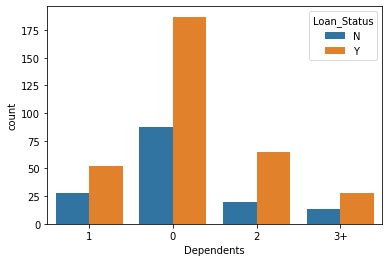

In [53]:
sns.countplot("Dependents",hue="Loan_Status",data=df)

_Applicants with 0 dependents are having high chances of getting loan approval._

<AxesSubplot:xlabel='Education', ylabel='count'>

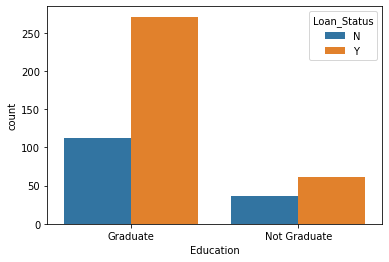

In [54]:
sns.countplot("Education",hue="Loan_Status",data=df)

_Banks are granting loan to the educated applicants moslty._

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

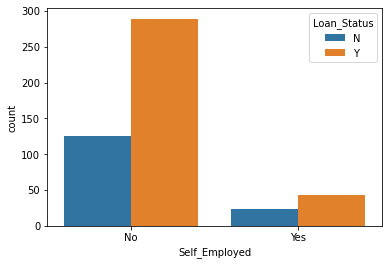

In [56]:
sns.countplot("Self_Employed",hue="Loan_Status",data=df)

_People working under some organization are more likely to get loan approval._

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

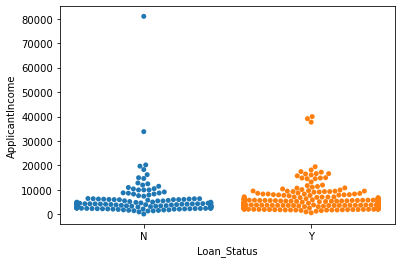

In [60]:
sns.swarmplot(x='Loan_Status',y='ApplicantIncome',data=df)

_Not much relation can be observed with income of the applicant._

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

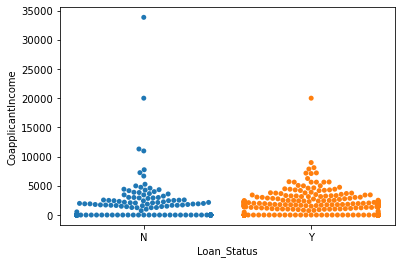

In [61]:
sns.swarmplot(x='Loan_Status',y='CoapplicantIncome',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

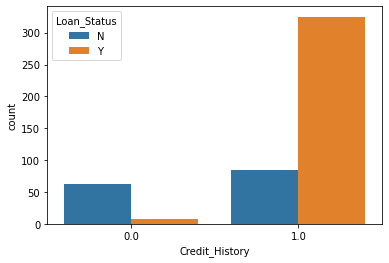

In [62]:
sns.countplot("Credit_History",hue="Loan_Status",data=df)

_Applicants are granted loan who have a credit history._

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

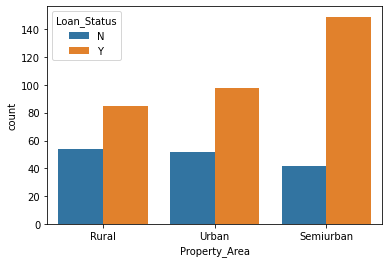

In [64]:
sns.countplot("Property_Area",hue="Loan_Status",data=df)

_Semiurban people has high chances of getting loan approved._

# Multivariate Analysis :

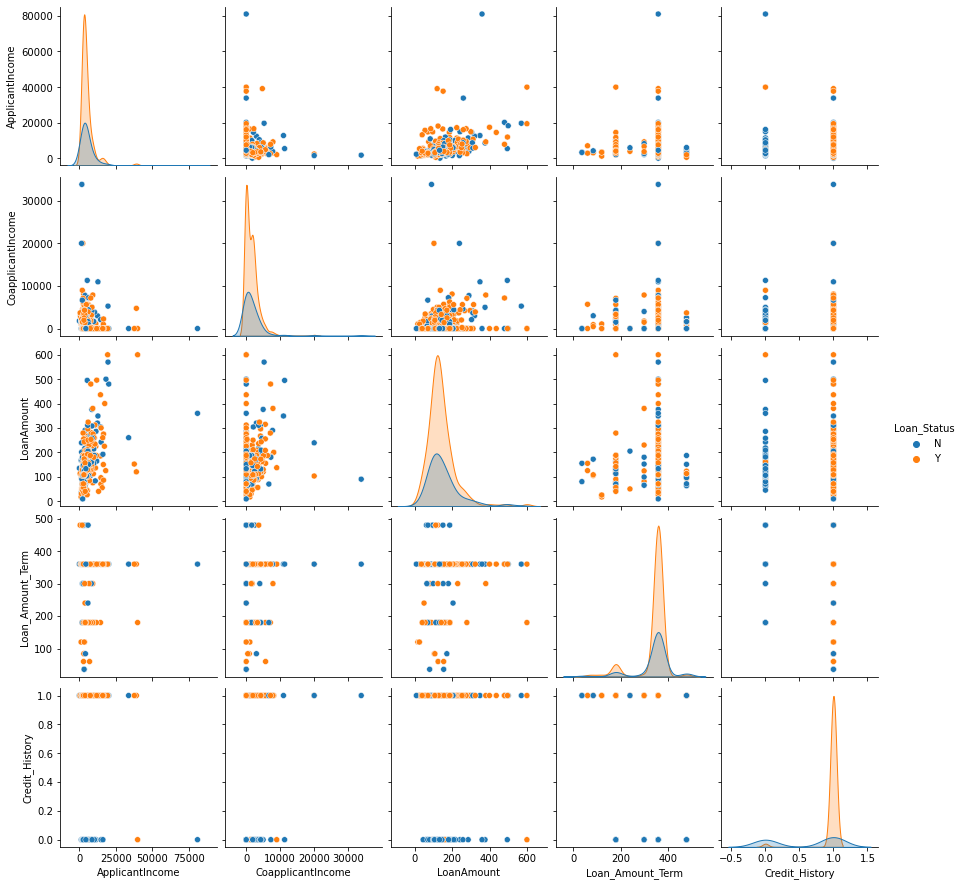

In [65]:
sns.pairplot(df,hue="Loan_Status")

# Label Encoding :

In [66]:
from sklearn import preprocessing

In [67]:
le = preprocessing.LabelEncoder()

In [69]:
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [70]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


_So all the features are converted into numeric form._

In [75]:
# Checking various factors of the dataset

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,480.0,NaN,NaN,NaN,0.820833,0.383892,0.0,1.0,1.0,1.0,1.0
Married,480.0,NaN,NaN,NaN,0.647917,0.478118,0.0,0.0,1.0,1.0,1.0
Dependents,480,4,0,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,480.0,NaN,NaN,NaN,0.202083,0.401973,0.0,0.0,0.0,0.0,1.0
Self_Employed,480.0,NaN,NaN,NaN,0.1375,0.344734,0.0,0.0,0.0,0.0,1.0
ApplicantIncome,480.0,NaN,NaN,NaN,5364.23125,5668.251251,150.0,2898.75,3859.0,5852.5,81000.0
CoapplicantIncome,480.0,NaN,NaN,NaN,1581.093583,2617.692267,0.0,0.0,1084.5,2253.25,33837.0
LoanAmount,480.0,NaN,NaN,NaN,144.735417,80.508164,9.0,100.0,128.0,170.0,600.0
Loan_Amount_Term,480.0,NaN,NaN,NaN,342.05,65.212401,36.0,360.0,360.0,360.0,480.0
Credit_History,480.0,NaN,NaN,NaN,0.854167,0.353307,0.0,1.0,1.0,1.0,1.0


__Observation :__

1. Skewed data is present in "ApplicantIncome", "CoapplicantIncome", "LoanAmount", because mean value is greater than its median.
2. Outliers may be present in columns "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", due to much between 75th percentile and max value.

In [76]:
# Checking Skewness of the dataset

df.skew()

Gender              -1.678471
Married             -0.621334
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

_The data is fairly symmetrical if the skewness is between +/-0.5._

_If the skewness is between -1 and – 0.5 or between 0.5 and 1, then there is a little decent skewness._

_If the skewness is less than -1 or greater than 1, the data are highly skewed._

__Observation :__

High skewness can be seen in most of the columns.

So we need to handle these column as they are highly skewed. But before doing that we need the check the correlation of these features with our target.

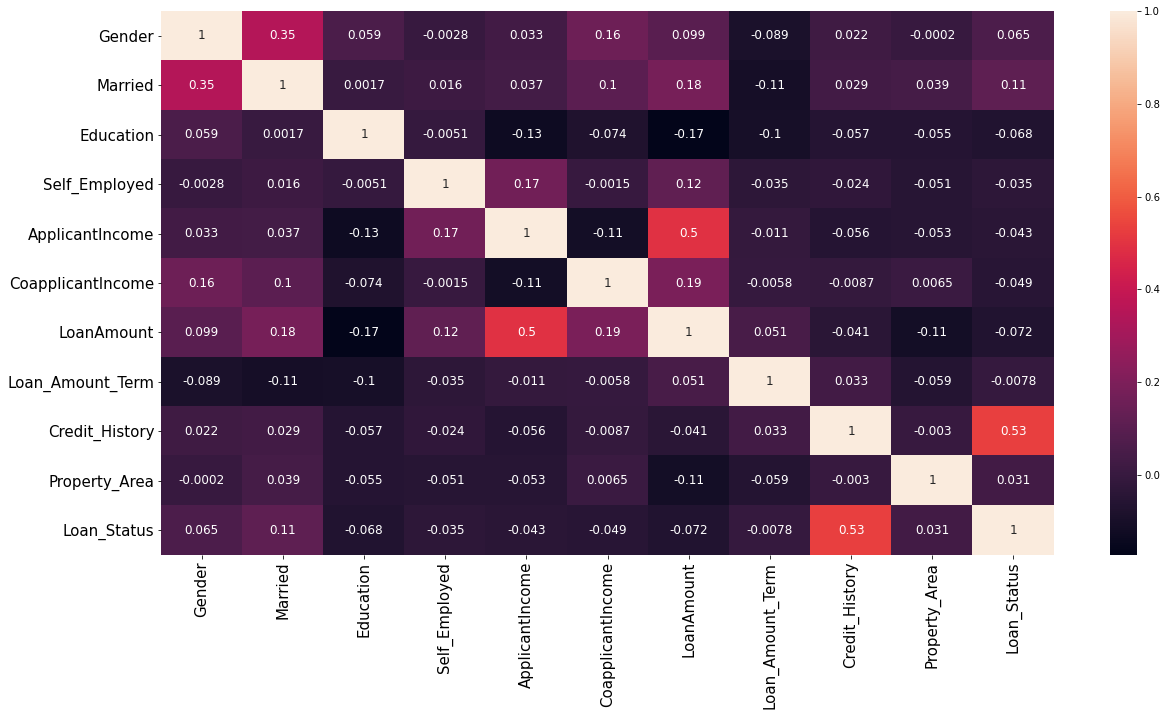

In [80]:
# Checking correlation

corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={'size':12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [81]:
df.skew()

Gender              -1.678471
Married             -0.621334
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

_So from here we can observe that columns "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term" are negatively correlated with our target. So we will try to remove their skewness and check again._ 

In [83]:
import numpy as np

In [84]:
df['Education']=np.sqrt(df['Education'])
df['Self_Employed']=np.sqrt(df['Self_Employed'])
df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome']=np.sqrt(df['CoapplicantIncome'])
df['LoanAmount']=np.sqrt(df['LoanAmount'])
df['Loan_Amount_Term']=np.sqrt(df['Loan_Amount_Term'])

In [85]:
df.skew()

Gender              -1.678471
Married             -0.621334
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      2.826104
CoapplicantIncome    0.819551
LoanAmount           1.041663
Loan_Amount_Term    -2.970170
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

_Some of the skewness are reduced, while some are still present and unable to reduce further._

# Detecting Outliers :

Gender                  AxesSubplot(0.125,0.749828;0.227941x0.130172)
Married              AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Education            AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Self_Employed           AxesSubplot(0.125,0.593621;0.227941x0.130172)
ApplicantIncome      AxesSubplot(0.398529,0.593621;0.227941x0.130172)
CoapplicantIncome    AxesSubplot(0.672059,0.593621;0.227941x0.130172)
LoanAmount              AxesSubplot(0.125,0.437414;0.227941x0.130172)
Loan_Amount_Term     AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Credit_History       AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Property_Area           AxesSubplot(0.125,0.281207;0.227941x0.130172)
Loan_Status          AxesSubplot(0.398529,0.281207;0.227941x0.130172)
dtype: object

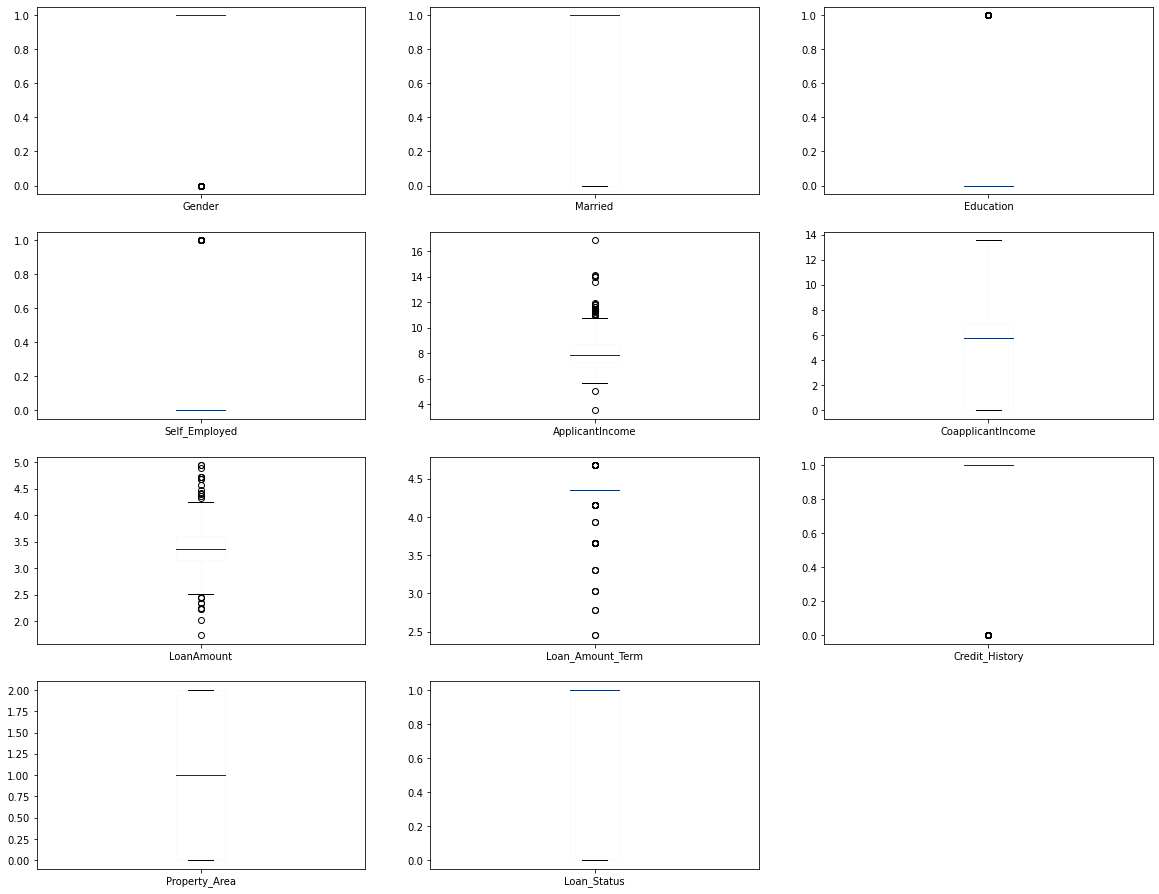

In [88]:
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(20,20), colormap='Blues')

Through this visualizations, the outliers are clearly visible.

And we need to remove them.

In [93]:
df['Dependents']=le.fit_transform(df['Dependents'])

In [89]:
# Importing required zscore library

from scipy.stats import zscore

In [95]:
z=np.abs(zscore(df))

In [96]:
threshold=3

In [97]:
df_new=df[(z<3).all(axis=1)] 

In [98]:
print('Shape of original dataframe', df.shape)

Shape of original dataframe (480, 12)


In [99]:
print('Shape of dataframe after outliers removal', df_new.shape)

Shape of dataframe after outliers removal (456, 12)


In [100]:
# Data loss percentage

loss=((480-456)/480)*100
print('Data loss percentage ',loss)

Data loss percentage  5.0


Here we can see the difference between our original df shape and df_new shape, and the percentage of data loss. Much of the outliers are removed with 5% and we can't afford to lose more data and will proceed further with these values.

In [101]:
df=df_new

In [102]:
df.shape

(456, 12)

# Spliting dataframe :

In [105]:
# Data part

x=df.iloc[:,:11]
x.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0.0,0.0,8.227871,6.231611,3.363586,4.355877,1.0,0


In [106]:
# Target

y=df.iloc[:,11]
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int32

# Variance Inflation Factor :
__<font color=orange>It helps us to eliminate multi co-linearity.</font>__

In [107]:
# Importing required library for variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [109]:
vif_calc()

    VIF Factor           Features
0     6.798223             Gender
1     3.981080            Married
2     1.900846         Dependents
3     1.294138          Education
4     1.248843      Self_Employed
5    98.425869    ApplicantIncome
6     3.493987  CoapplicantIncome
7   147.613024         LoanAmount
8    94.701864   Loan_Amount_Term
9     6.960522     Credit_History
10    2.766395      Property_Area


Now, here we will find the highest values, which are "ApplicantIncome", "LoanAmount", "Loan_Amount_Term".

Now we need to check the individual impact on the target[Loan_Status], from these attributes.

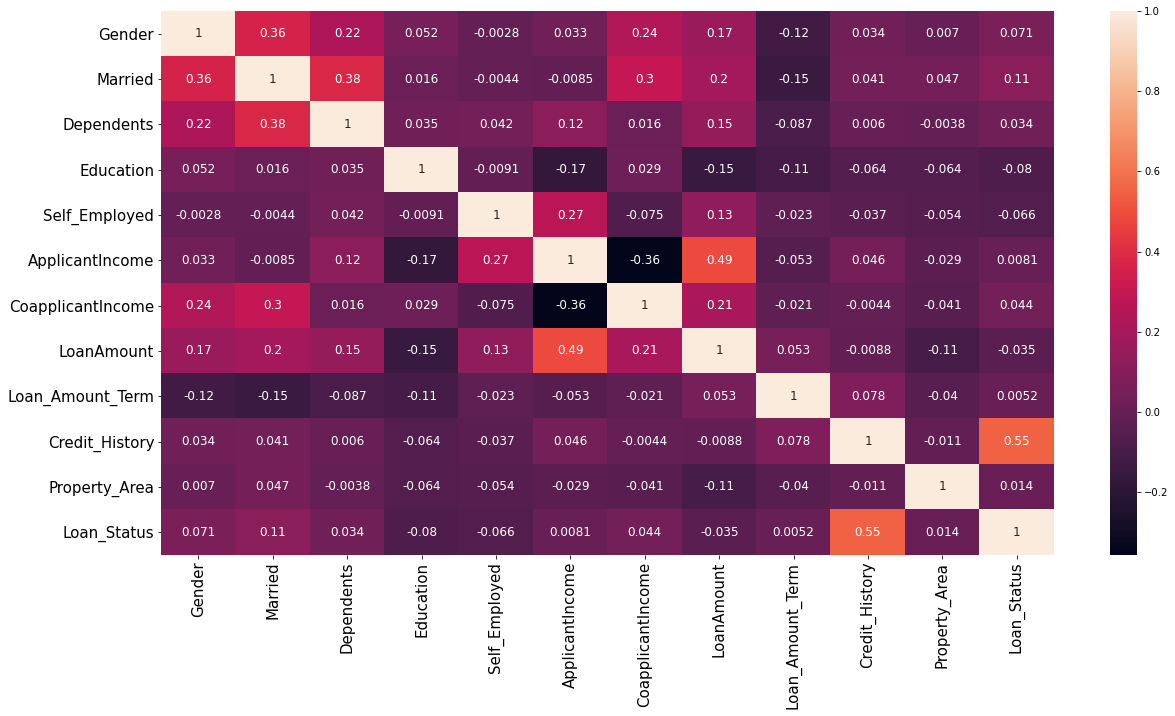

In [110]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={'size':12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

_From here we can know that "LoanAmount" is negatively correlated with our target and also has a very high variance factor. Hence it can be dropped.

In [111]:
df.drop(['LoanAmount'], axis=1, inplace=True)

In [112]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0.0,0.0,8.227871,6.231611,4.355877,1.0,0,0


Successfully dropped.

# Feature Scaling :
__<font color=orange>To transform the dataset into same format, so that we have a uniform dataset.</font>__

In [113]:
# Importing required scaler library

from sklearn.preprocessing import StandardScaler

In [114]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.464758,0.742307,0.235713,-0.509577,-0.392976,0.123414,0.658703,-0.021409,0.256024,0.415014,-1.314627
1,0.464758,0.742307,-0.750388,-0.509577,2.544683,-0.608354,-1.086781,-1.407943,0.256024,0.415014,1.252696
2,0.464758,0.742307,-0.750388,1.962413,-0.392976,-0.848832,0.865091,-0.166824,0.256024,0.415014,1.252696
3,0.464758,-1.347151,-0.750388,-0.509577,-0.392976,0.630623,-1.086781,0.200978,0.256024,0.415014,1.252696
4,0.464758,0.742307,1.221814,-0.509577,2.544683,0.434147,1.167585,1.811870,0.256024,0.415014,1.252696
5,0.464758,0.742307,-0.750388,1.962413,-0.392976,-1.007334,0.661013,-0.674003,0.256024,0.415014,1.252696
6,0.464758,0.742307,2.207915,-0.509577,-0.392976,-0.588797,0.894628,0.469674,0.256024,-2.409558,-0.030966
7,0.464758,0.742307,1.221814,-0.509577,-0.392976,-0.117414,0.663888,0.617733,0.256024,0.415014,1.252696
8,0.464758,0.742307,0.235713,-0.509577,-0.392976,2.262181,1.779688,2.567976,0.256024,0.415014,-0.030966
9,0.464758,0.742307,1.221814,-0.509577,-0.392976,-0.501844,0.353974,-1.293853,0.256024,0.415014,1.252696


# Power Transformation :
I will use Yeo-Johnson to transform this dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [115]:
# First importing the required library for power transformation

from sklearn.preprocessing import PowerTransformer

In [116]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.464758,0.742307,0.721364,-0.509577,-0.392976,0.302702,0.635809,-0.000951,0.107184,0.415014,-1.306179
1,0.464758,0.742307,-0.826782,-0.509577,2.544683,-0.554972,-1.080575,-1.431541,0.107184,0.415014,1.260376
2,0.464758,0.742307,-0.826782,1.962413,-0.392976,-0.888921,0.856579,-0.147257,0.107184,0.415014,1.260376
3,0.464758,-1.347151,-0.826782,-0.509577,-0.392976,0.759645,-1.080575,0.220503,0.107184,0.415014,1.260376
4,0.464758,0.742307,1.305781,-0.509577,2.544683,0.592568,1.185350,1.770024,0.107184,0.415014,1.260376


In [117]:
# Rechecking VIF

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [118]:
vif_calc()

    VIF Factor           Features
0     1.215394             Gender
1     1.452745            Married
2     1.247854         Dependents
3     1.062594          Education
4     1.065424      Self_Employed
5     1.990762    ApplicantIncome
6     1.628517  CoapplicantIncome
7     1.737036         LoanAmount
8     1.064476   Loan_Amount_Term
9     1.016925     Credit_History
10    1.029350      Property_Area


__So after scaling and power transforamtion, VIF factors are balanced to an exceptable range.__

# SMOTE :
To balance the categorical imbalance in target.

In [119]:
from imblearn.over_sampling import SMOTE

In [120]:
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [121]:
y.value_counts()

0    319
1    319
Name: Loan_Status, dtype: int64

Hence the target is balanced, and now we can proceed with machine learning models.

# Machine Learning Models :
Here we have a classification case, hence we'll go with Logistic Regression and various other classification models.

In [122]:
# Importing the necessary libraries :

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve 

# Spliting dataframe and finding best random state :

In [123]:
lr=LogisticRegression()

In [124]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
# predicting the x_train so that we can cross check how well the model is performing    
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test, pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train, pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test, pred_test)*100, '\n\n')

At random state 108  The model performs very well
At random_state:- 108
Training accuracy_score is:- 72.74509803921568
Testing accuracy_score is:- 72.65625 


At random state 276  The model performs very well
At random_state:- 276
Training accuracy_score is:- 72.74509803921568
Testing accuracy_score is:- 72.65625 


At random state 379  The model performs very well
At random_state:- 379
Training accuracy_score is:- 72.74509803921568
Testing accuracy_score is:- 72.65625 


At random state 506  The model performs very well
At random_state:- 506
Training accuracy_score is:- 72.74509803921568
Testing accuracy_score is:- 72.65625 


At random state 524  The model performs very well
At random_state:- 524
Training accuracy_score is:- 72.74509803921568
Testing accuracy_score is:- 72.65625 


At random state 734  The model performs very well
At random_state:- 734
Training accuracy_score is:- 72.74509803921568
Testing accuracy_score is:- 72.65625 


At random state 765  The model performs very w

So, we have found some of the good random state values with the help of Logistic Regression, and will select the one which gives highest accuracy.

108 random state with accuracy score 72.7

# Required Evaluation Metrices :

In [125]:
# Spliting the dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=108)
# Here 20% will be used for testing purpose and rest 80% for training purpose.

In [126]:
# First we'll create list of all the classification models to be used

models=[LogisticRegression(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        SVC(), # default kernel='rbf'
        SVC(kernel='poly')]

In [127]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train, y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.7265625
[[33 24]
 [11 60]]
              precision    recall  f1-score   support

           0       0.75      0.58      0.65        57
           1       0.71      0.85      0.77        71

    accuracy                           0.73       128
   macro avg       0.73      0.71      0.71       128
weighted avg       0.73      0.73      0.72       128



Accuracy score of GaussianNB() is:
0.7890625
[[36 21]
 [ 6 65]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        57
           1       0.76      0.92      0.83        71

    accuracy                           0.79       128
   macro avg       0.81      0.77      0.78       128
weighted avg       0.80      0.79      0.78       128



Accuracy score of DecisionTreeClassifier() is:
0.8359375
[[50  7]
 [14 57]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        57
           1       0.

# Ensemble Techniques :

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy score of',rfc,'is:')
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

Accuracy score of RandomForestClassifier(random_state=42) is:
0.875
[[50  7]
 [ 9 62]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        57
           1       0.90      0.87      0.89        71

    accuracy                           0.88       128
   macro avg       0.87      0.88      0.87       128
weighted avg       0.88      0.88      0.88       128



In [130]:
adc=AdaBoostClassifier()
adc.fit(x_train,y_train)
predadc=adc.predict(x_test)
print('Accuracy score of',adc,'is:')
print(accuracy_score(y_test,predadc))
print(confusion_matrix(y_test,predadc))
print(classification_report(y_test,predadc))

Accuracy score of AdaBoostClassifier() is:
0.7578125
[[45 12]
 [19 52]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        57
           1       0.81      0.73      0.77        71

    accuracy                           0.76       128
   macro avg       0.76      0.76      0.76       128
weighted avg       0.76      0.76      0.76       128



In [131]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print('Accuracy score of',gbc,'is:')
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

Accuracy score of GradientBoostingClassifier() is:
0.875
[[49  8]
 [ 8 63]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        57
           1       0.89      0.89      0.89        71

    accuracy                           0.88       128
   macro avg       0.87      0.87      0.87       128
weighted avg       0.88      0.88      0.88       128



So, from above all the models, we found the highest score :

__Accuracy score of RandomForestClassifier(random_state=42) is: 0.875__

# Cross validation score for RandomForestClassifier() :

In [132]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)
rfc.score(x_train, y_train)
predrfc=rfc.predict(x_test)
acc=accuracy_score(y_test,predrfc)
for i in range(2,10):
    cross=cross_val_score(rfc,x,y,cv=i)
    cvs=cross.mean()
    print("At cv:-",i)
    print("Cross validation score is:-",cvs*100 )
    print('Accuracy score is:', acc*100)
    print("\n")

At cv:- 2
Cross validation score is:- 79.46708463949844
Accuracy score is: 87.5


At cv:- 3
Cross validation score is:- 82.75976614403402
Accuracy score is: 87.5


At cv:- 4
Cross validation score is:- 83.71462264150944
Accuracy score is: 87.5


At cv:- 5
Cross validation score is:- 84.18676181102363
Accuracy score is: 87.5


At cv:- 6
Cross validation score is:- 83.87262681478869
Accuracy score is: 87.5


At cv:- 7
Cross validation score is:- 84.01644938912021
Accuracy score is: 87.5


At cv:- 8
Cross validation score is:- 85.28876582278482
Accuracy score is: 87.5


At cv:- 9
Cross validation score is:- 84.4936284372904
Accuracy score is: 87.5




In [133]:
score_selected= cross_val_score(rfc,x,y,cv=8).mean()
print ("The cv score is: ", score_selected, "\nThe accuracy score is: ",acc)

The cv score is:  0.8528876582278482 
The accuracy score is:  0.875


# Hyper Parameter Tuning :
Applying hyper parameter tuning using Grid Search CV method, to find the best parameters of RandomForestClassifier()

In [ ]:
RandomForestClassifier(n_estimators=100,
    criterion={"gini", "entropy"},
    max_features={"auto", "sqrt", "log2"},
    class_weight={"balanced", "balanced_subsample"})

_These are the some of the parameters for RandomForestClassifier(), which i found by clicking shift+tab buttons inside the function._

_First we have to create a dictionary of these parameters so that it can be passsed to the grid search function._

In [134]:
params={'n_estimators':[100],
    'criterion':["gini", "entropy"],
    'max_features':["auto", "sqrt", "log2"],
    'class_weight':["balanced", "balanced_subsample"]}

In [135]:
grid=GridSearchCV(RandomForestClassifier(), params, cv=8)

In [136]:
grid.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

In [137]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 100}

So here we have found the best parameters for our model, and now we can finally train our model.

In [138]:
RFC=RandomForestClassifier(class_weight='balanced',
                           criterion='entropy',
                           max_features='sqrt',
                           n_estimators=100)

In [139]:
RFC.fit(x_train,y_train)
RFC.score(x_train, y_train)
pred=RFC.predict(x_test)
print('Accuracy score of',RFC,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
print('\n')

Accuracy score of RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt') is:
0.8828125
[[50  7]
 [ 8 63]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        57
           1       0.90      0.89      0.89        71

    accuracy                           0.88       128
   macro avg       0.88      0.88      0.88       128
weighted avg       0.88      0.88      0.88       128





__<font color=orange>So, this is the best model that we have achieved.</font>__

# AUC ROC Curve :

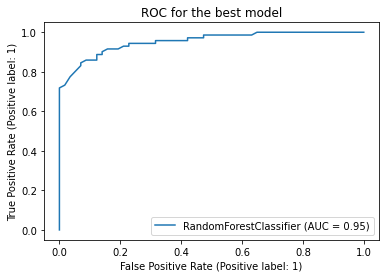

In [140]:
plot_roc_curve(RFC, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# SERIALIZATION :

In [141]:
import pickle
filename='bestloan.pkl'
pickle.dump(RFC,open(filename,'wb'))

__<font color=orange>THANK YOU.</font>__